### Import nessary modules

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
# import keras
# from keras.layers import Dense
# from keras.models import Sequential

### import the data

In [178]:
df = pd.read_csv(r"E:\Projects\fake job detection\data\fake_job_postings.csv")

df.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [179]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
"""Missing values"""
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [181]:
df.shape

(17880, 18)

### Check if there is any null value

In [182]:
df.isna().apply(pd.value_counts)

C:\Users\Rahul.G\AppData\Local\Temp\ipykernel_19440\2875504200.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df.isna().apply(pd.value_counts)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
False,17880.0,17880.0,17534,6333,2868,14572,17879,15184,10668,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,17880.0
True,NaN,NaN,346,11547,15012,3308,1,2696,7212,NaN,NaN,NaN,3471,7050,8105,4903,6455,NaN


### exploring data for intresting points

In [ ]:
#Differentiate categorical data and numerical data
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

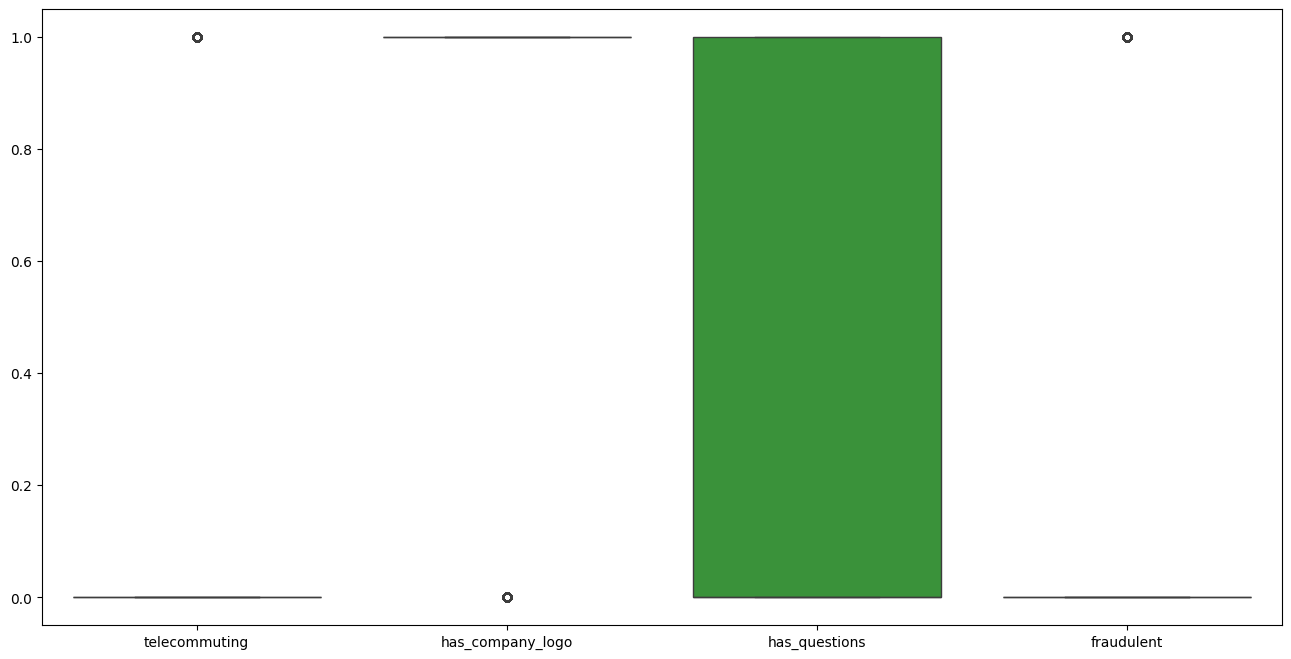

In [184]:
# Checking for Outliers in numerical data
plt.figure(figsize=[16,8])
sns.boxplot(data = df_num)
plt.show()

### Removing Outliers from columns

In [185]:

df_num = df_num[df_num['telecommuting'] < 0.9 ]
df_num = df_num[df_num['fraudulent'] < 0.9 ]
df_num = df_num[df_num['has_company_logo'] > 0.1 ]
# df_num

### removing nulls

In [186]:
new_df = df
new_df.dropna(axis= 0, how= 'any', inplace=True)
new_df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

### Plots to see the distribution of the continuous features individually


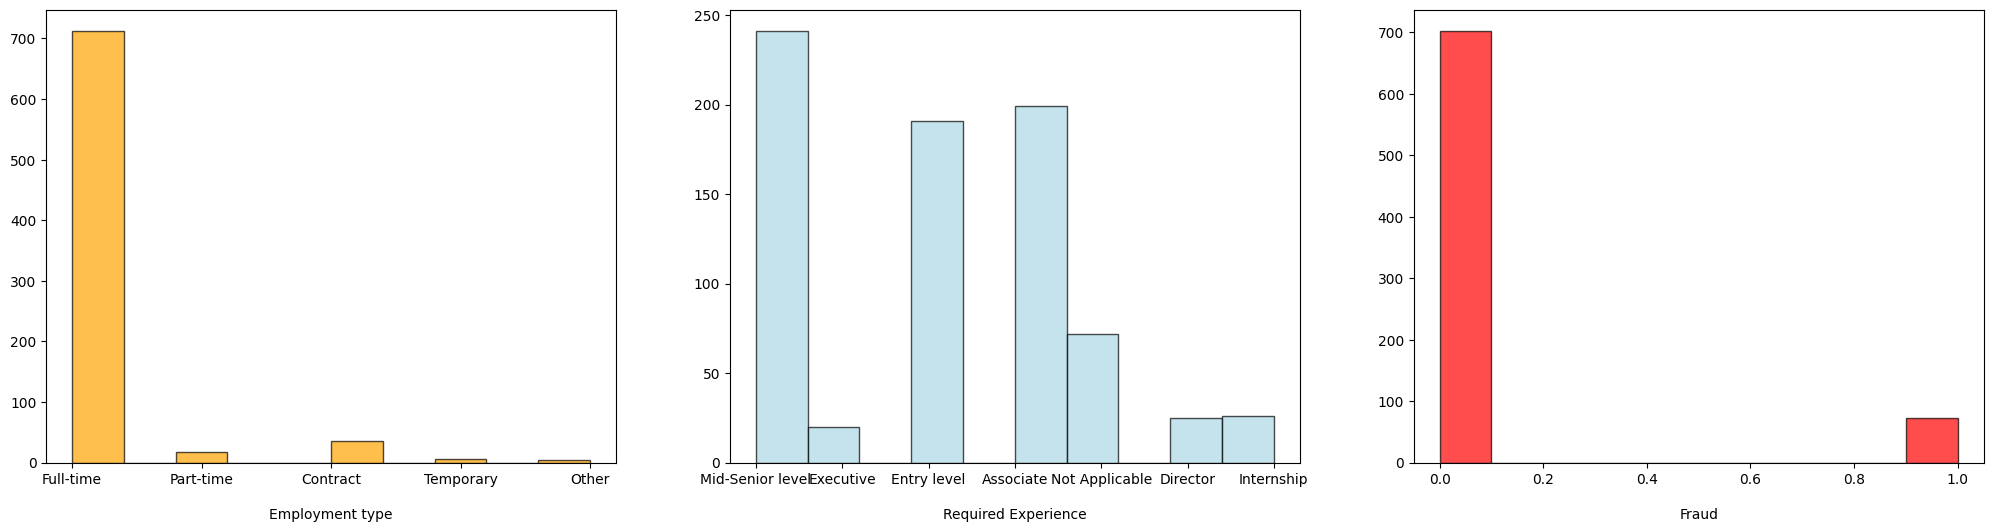

In [189]:
plt.figure(figsize= (25,20))
plt.subplot(3,3,1)
plt.hist(new_df.employment_type, color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nEmployment type')

plt.subplot(3,3,2)
plt.hist(new_df.required_experience, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nRequired Experience')

plt.subplot(3,3,3)
plt.hist(new_df.fraudulent, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nFraud')

plt.show()

### Ploting target variables

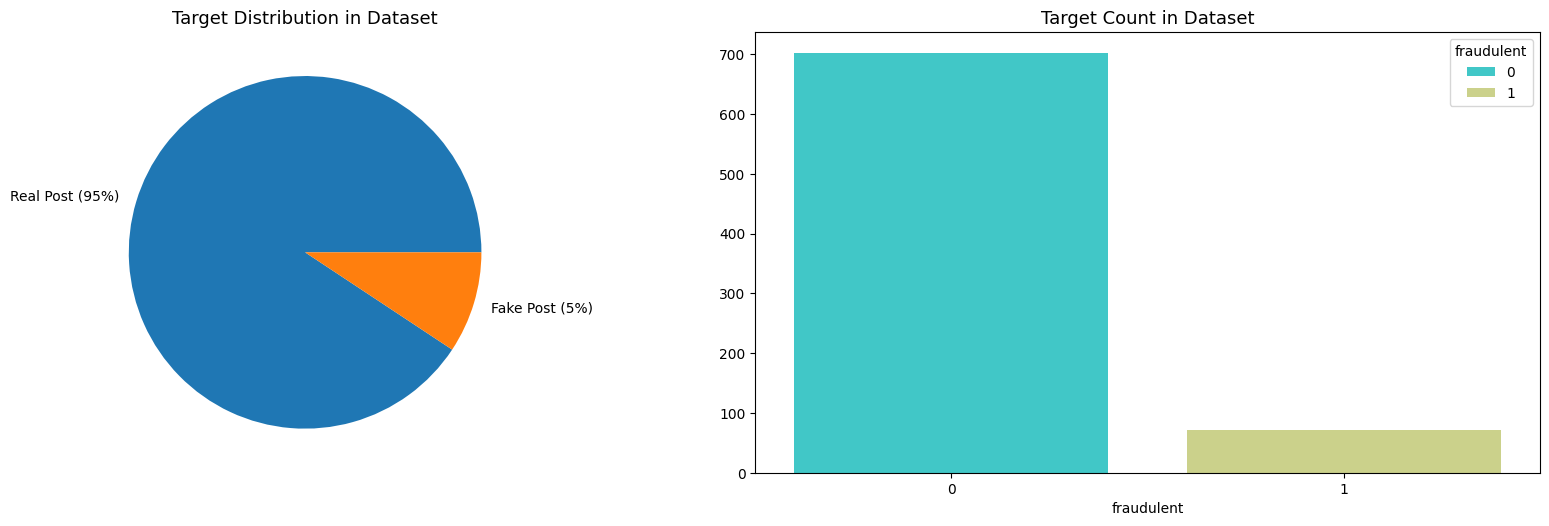

In [190]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

df["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
temp = df["fraudulent"].value_counts()
sns.countplot(data=df,ax=axes[1],x='fraudulent',palette='rainbow',hue='fraudulent')

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

### Catagorical Feature

In [191]:
cat_df = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]
cat_df = cat_df.fillna("None")

cat_df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
15,0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
23,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
98,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
102,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0


### visualizating catagorical variable by target

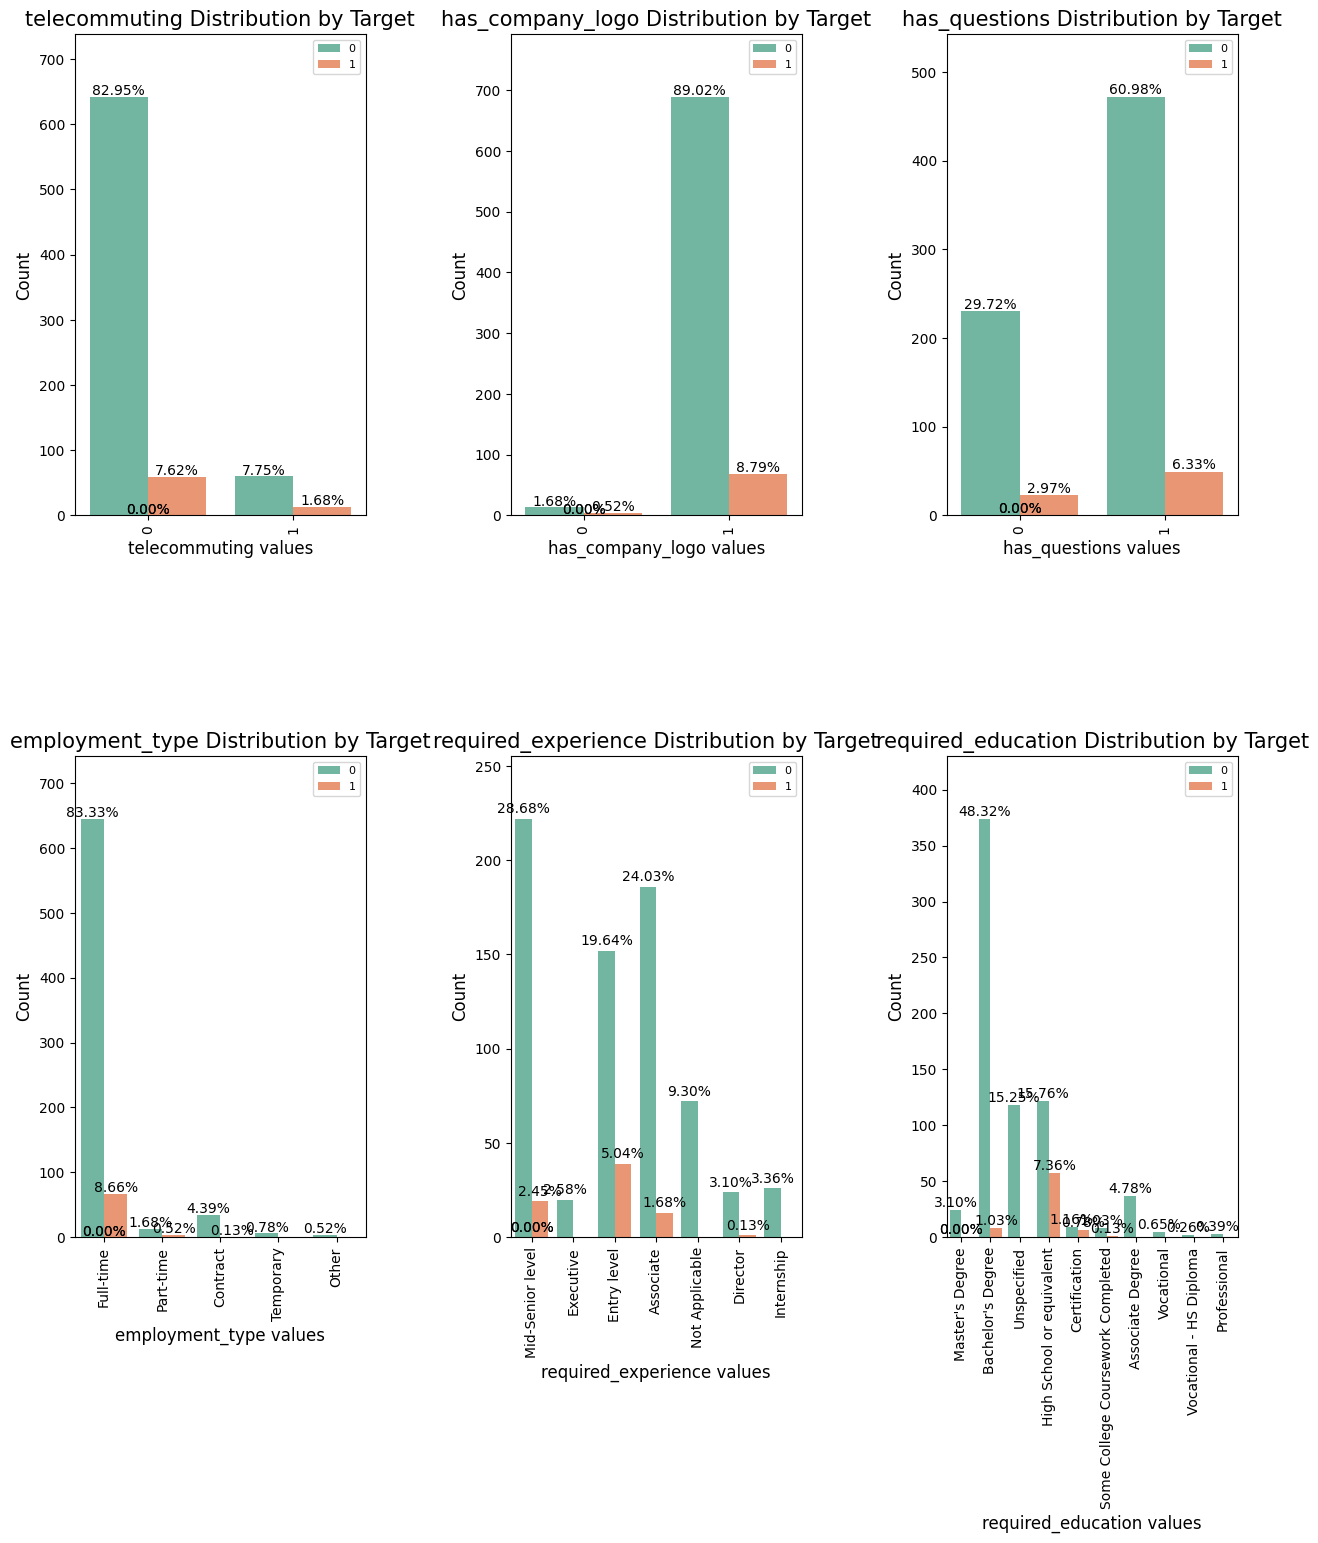

In [192]:
cat_cols = ["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education",]
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(15,25)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(cat_df[cat_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=cat_df, hue='fraudulent', palette='Set2') 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    # ax.set_xticklabels(xlabels,  fontsize=10)
    # ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90) 
    total = len(cat_df)
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights


plt.show()

In [ ]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)

In [ ]:
numerical_to_drop=['telecommuting','has_questions']

df.drop(columns=numerical_to_drop, inplace=True)

df=df[df['has_company_logo']>0.0]

df['country'] = df['location'].str.split(',').str[0]

In [138]:
fake=df[df['fraudulent']==1]
fake.shape

(68, 17)

In [139]:
real=df[df['fraudulent']==0]
real.shape

(689, 17)

In [ ]:
fake=fake.sample(13937,replace=True)

In [140]:
real.shape,fake.shape

((689, 17), (68, 17))

In [141]:
df = pd.concat([fake, real], ignore_index=True)
df.reset_index()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,0,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,US
1,1,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,US
2,2,629,UST Testing Technician II,"US, CA, Bakersfield",Oil & Energy,65000-75000,Jaco Oil and Refined Resources have partnered ...,Qualified candidates are encouraged to apply d...,Job site set-up.Loading and unloading of equip...,Competitive compensation package including bas...,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1,US
3,3,741,Health + Safety Professional,"US, CA, Bakersfield",HSE (Health Safety Environmental),80000-120000,...,Health &amp; Safety Professional | Bakersfield...,Duties and Responsibilities:Provides safety po...,What is offered:Competitive compensation packa...,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Other,1,US
4,4,813,UST Testing Technician II,"US, CA, Bakersfield",Oil & Energy,65000-75000,...,"UST Testing Technician II Bakersfield, CA L...",Job site set-up.Loading and unloading of equip...,Competitive compensation package including bas...,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,752,17363,Customer Success Associate,"US, NY, New York",Support,40000-60000,We launched Involvio as students at Drexel Uni...,We’re looking for an enthusiastic individual t...,"4-year degreeFluent in English, additional lan...",Cool midtown office close to Grand CentralBran...,1,Full-time,Associate,Bachelor's Degree,Internet,Customer Service,0,US
753,753,17372,Account Manager,"NZ, N, Auckland",Customer Service,55000-65000,HealthLink provides a computer communications ...,Do you have a flair for customer engagement?Ar...,Good computer skills: experience in Microsoft ...,Stimulating environment with high performance ...,1,Full-time,Not Applicable,Bachelor's Degree,Information Technology and Services,Customer Service,0,NZ
754,754,17489,Management Accountant,"NZ, N, Auckland",Finance,100000-110000,PowerbyProxi and its customers are leading a r...,PowerbyProxi is one of NZ's more promising Hig...,"Reporting to the CFO, the Management Accountan...","Our work environment is exciting, fast-paced a...",1,Contract,Mid-Senior level,Bachelor's Degree,Electrical/Electronic Manufacturing,Finance,0,NZ
755,755,17850,Communication Designer,"US, CA, San Francisco",Design,80000-100000,Balanced Labs exists to provide accountants an...,Balanced Labs exists to improve the lives of a...,"Specifically, we’re looking for:5+ years of vi...","We offer great salaries, share options, and a ...",1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0,US


In [193]:
df.fillna(' ',inplace=True)

In [194]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [195]:
df['combined_text'] = df[['title', 'location', 'salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','department']].apply(lambda x: ' '.join(x), axis=1)

df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department'], inplace=True)

In [196]:
df.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,combined_text
6,7,0,1,1,0,"Head of Content (m/f) DE, BE, Berlin 20000-280..."
15,16,0,1,1,0,"VP of Sales - Vault Dragon SG, 01, Singapore 1..."
23,24,0,1,0,0,"Vice President, Sales and Sponsorship (Busines..."
98,99,0,1,1,1,"IC&E Technician US, , Stocton, CA 95000-115000..."
102,103,1,1,0,0,"Marketing Administrator GB, WAR, Coventry 1500..."


In [197]:
fake=df[df['fraudulent']==1]['combined_text']
real=df[df['fraudulent']==0]['combined_text']

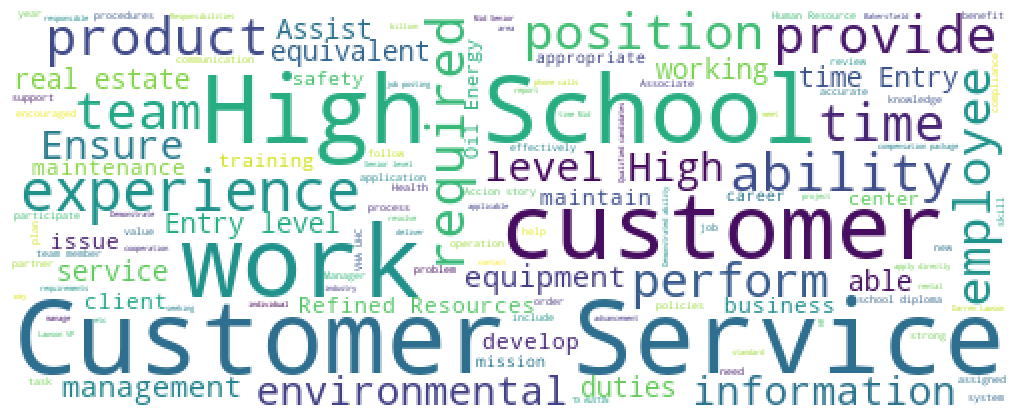

In [200]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(fake))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

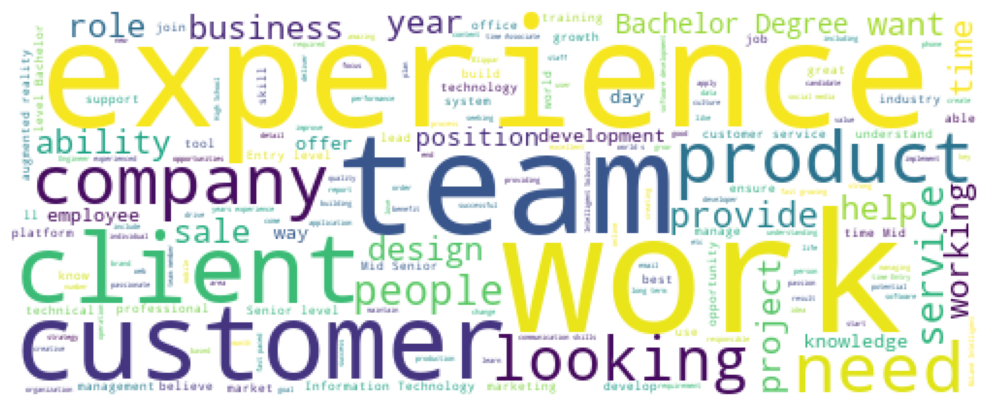

In [201]:
wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(real))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

In [202]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [203]:
df['combined_text']=df['combined_text'].apply(clean_text)

In [204]:
df.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,combined_text
6,7,0,1,1,0,head content f de berlin 20000 28000 founded 2...
15,16,0,1,1,0,vp sales vault dragon sg 01 singapore 120000 1...
23,24,0,1,0,0,vice president sales sponsorship businessfrien...
98,99,0,1,1,1,ic e technician us stocton ca 95000 115000 sta...
102,103,1,1,0,0,marketing administrator gb war coventry 15000 ...


In [205]:
nlp = spacy.load("en_core_web_sm")

def normalize_text(text):
    # Tokenize the text and apply lemmatization
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc]
    normalized_text = ' '.join(normalized_words)
    return normalized_text


In [206]:
df['combined_text']=df['combined_text'].apply(normalize_text)

In [212]:
import pickle
from scipy.sparse import hstack,csr_matrix
from sklearn.model_selection import learning_curve,cross_val_score

In [209]:
text_columns = ['combined_text']

df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)
df['pos_features'] = df['pos_features'].apply(lambda tags: ' '.join(tag[1] for tag in tags))

X_train = df.drop('fraudulent', axis=1)
y_train = df['fraudulent']

vectorizer = CountVectorizer(ngram_range=(1, 2))
text_matrix_train = vectorizer.fit_transform(X_train['combined_text'])
pos_matrix_train = vectorizer.transform(X_train['pos_features'])
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])

with open('countvectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

C:\Users\Rahul.G\AppData\Local\Temp\ipykernel_19440\3994699578.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)


In [210]:
X=combined_matrix_train
y=df['fraudulent'].values

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix,precision_score

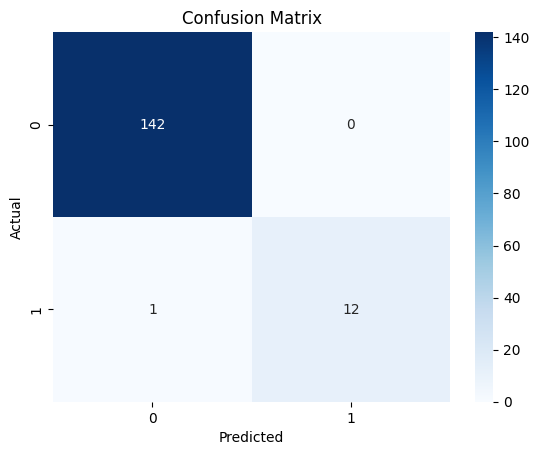

Cross-validation scores: [0.99193548 1.         0.99193548 0.99193548 0.99186992]
Average cross-validation score: 0.993535274062418
Test set accuracy: 0.9935483870967742
Test set precision: 1.0
Test set recall: 0.9230769230769231
Test set F1 score: 0.96


In [214]:
model = LogisticRegression(max_iter=500)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

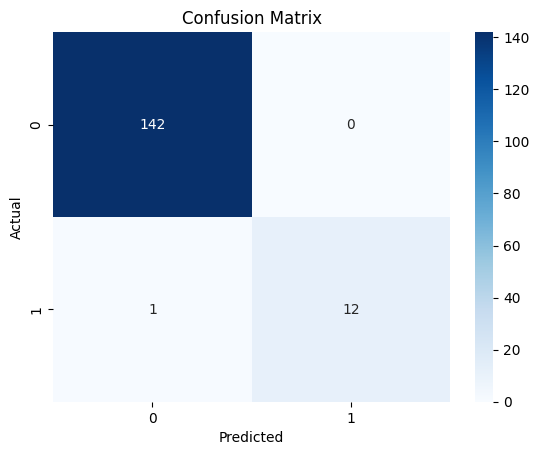

Cross-validation scores: [0.99193548 1.         0.99193548 0.99193548 0.99186992]
Average cross-validation score: 0.993535274062418
Test set accuracy: 0.9935483870967742
Test set precision: 1.0
Test set recall: 0.9230769230769231
Test set F1 score: 0.96


In [215]:
model2 = MultinomialNB()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

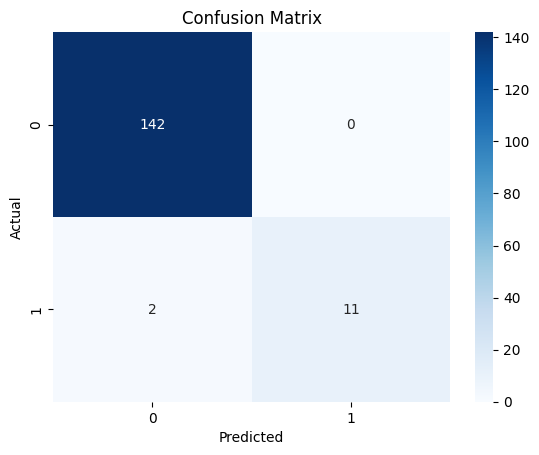

Cross-validation scores: [0.99193548 1.         0.99193548 0.99193548 0.99186992]
Average cross-validation score: 0.993535274062418
Test set accuracy: 0.9870967741935484
Test set precision: 1.0
Test set recall: 0.8461538461538461
Test set F1 score: 0.9166666666666666


In [216]:
model3 = SVC()
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

In [218]:
from sklearn.tree import DecisionTreeClassifier


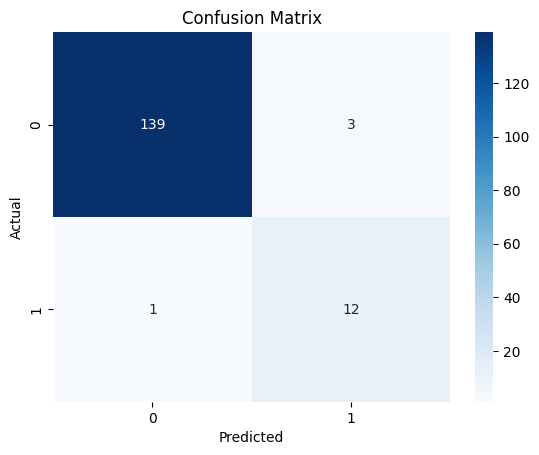

Cross-validation scores: [0.99193548 1.         0.99193548 0.99193548 0.99186992]
Average cross-validation score: 0.993535274062418
Test set accuracy: 0.9741935483870968
Test set precision: 1.0
Test set recall: 0.9230769230769231
Test set F1 score: 0.8571428571428571


In [219]:
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)